In [ ]:
## Importing Required Libraries for project

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'/Users/michael/Downloads/movies.csv')

In [ ]:
## Data Cleaning - Making sure data is usable prior to conducting analysis over it

In [3]:
# Check for any missing data

df = pd.read_csv(r'/Users/michael/Downloads/movies.csv')

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print(('{} - {}%').format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
## Changing datatype of Budget and Gross columns to integers

df = df.fillna(0)

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [4]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,2020-10-23,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0
7664,Dream Round,0,Comedy,2020,2020-02-07,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,0,Drama,2020,2020-04-27,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0
7666,It's Just Us,0,Drama,2020,2020-10-01,0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0


In [5]:
## Creating a new column that takes the year from the Released column as a string
## For full transparency, the data came from Kaggle as [Month DD, YY]. I edited the CSV file to have them as YYYY-DD-MM to make this step easier

df['year_corrected'] = df['released'].astype(str).str[:4]

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,2020-10-23,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0,2020
7664,Dream Round,0,Comedy,2020,2020-02-07,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,0,Drama,2020,2020-04-27,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0,2020
7666,It's Just Us,0,Drama,2020,2020-10-01,0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0,2020


In [6]:
## Sorting data based on gross column (top = highest grossing, bottom = lowest grossing)

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,1990-01-26,4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,1989-04-14,5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,1989-04-07,6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,0,Comedy,1989,1990-01-13,7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


In [ ]:
# Data Analysis - Correlation Testing. Testing certain plots to check if there is a correlation from my hypotheses

# Hypotheses:

# A higher budget will result in a higher grossing film
# Certain Production comapnies will result in higher average grossing films based on name recognition

Text(0, 0.5, 'Gross (Scale = Billions)')

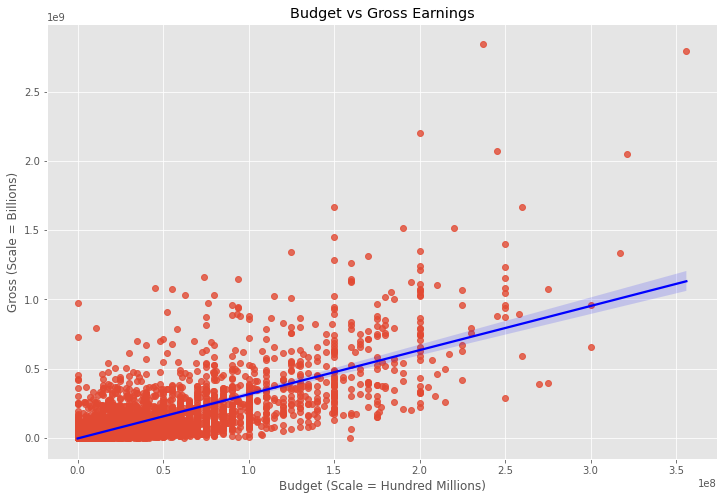

In [7]:
# Gross vs Budget - does a higher budget result in higher grossing sales?

plot = sns.regplot(x='budget',y='gross', data=df, line_kws={"color":"blue"})

plot.set_title('Budget vs Gross Earnings')
plot.set_xlabel('Budget (Scale = Hundred Millions)')
plot.set_ylabel('Gross (Scale = Billions)')

In [8]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


In [ ]:
## Conclusions: There is a medium-to-strong correlation between the budget of a film and the amount of money it grosses

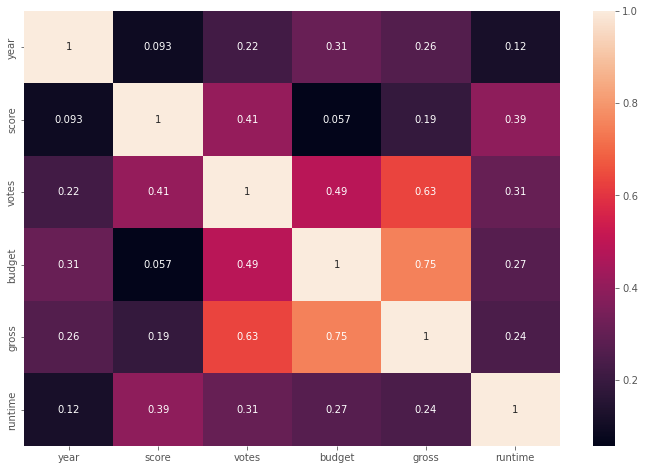

In [12]:
corr_matrix = df.corr(method='pearson')

sns.heatmap(corr_matrix, annot=True)

In [ ]:
## Does the Company have any correlation to the Gross earnings?

## Hypothesis: The Production Company will have a correlation with the gross earnings generated by movie sales

In [13]:
## Numerizing all non-numeric columns to allow for sub-analysis of this hypothesis (Country, Director, etc.)

df_numerize = df

for col_name in df_numerize.columns:
    if (df_numerize[col_name].dtype == 'object'):
        df_numerize[col_name] = df_numerize[col_name].astype('category')
        df_numerize[col_name] = df_numerize[col_name].cat.codes
        
df_numerize

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,6587,7,6,1980,25,8.4,927000.0,2589,4015,1048,55,19000000,46998772,2320,146.0,2
1,5573,7,1,1980,29,5.8,65000.0,2269,1633,328,56,4500000,58853106,732,104.0,2
2,5142,5,0,1980,26,8.7,1200000.0,1111,2568,1746,56,18000000,538375067,1541,124.0,2
3,286,5,4,1980,29,7.7,221000.0,1301,2001,2247,56,3500000,83453539,1813,88.0,2
4,1027,7,4,1980,33,7.3,108000.0,1054,522,411,56,6000000,39846344,1778,98.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,0,6,2020,2943,3.1,18.0,1500,2290,2422,56,7000,0,0,90.0,42
7664,1678,0,4,2020,2926,4.7,36.0,774,2615,1887,56,0,0,540,90.0,42
7665,4717,0,6,2020,2933,5.7,29.0,2061,2684,2041,56,58750,0,942,0.0,42
7666,2843,0,6,2020,2942,0.0,0.0,1184,1825,451,56,15000,0,0,120.0,42


<AxesSubplot:>

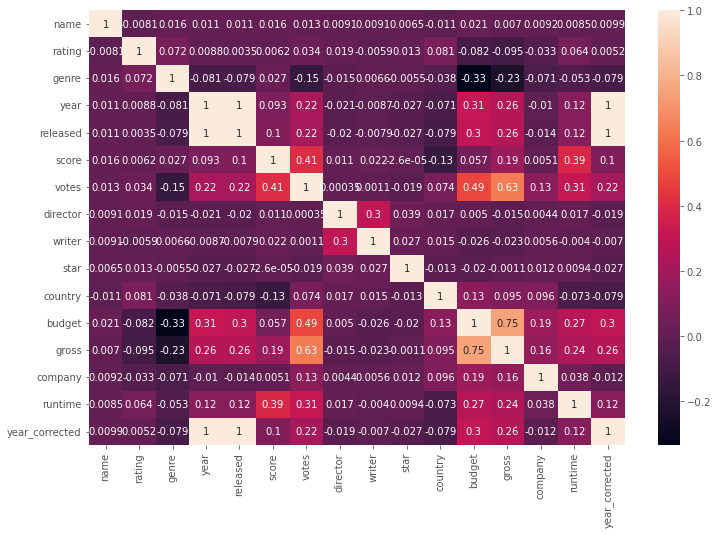

In [17]:
corr_matrix = df_numerize.corr(method='pearson')

sns.heatmap(corr_matrix, annot=True)

In [18]:
df_numerize.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
name,1.000000,-0.008069,0.016355,0.011453,0.010696,0.016377,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483,0.009936
rating,-0.008069,1.000000,0.072423,0.008779,0.003496,0.006192,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133,0.005158
genre,0.016355,0.072423,1.000000,-0.081261,-0.078592,0.027384,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914,-0.079287
year,0.011453,0.008779,-0.081261,1.000000,0.995343,0.092616,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358,0.995240
released,0.010696,0.003496,-0.078592,0.995343,1.000000,0.102265,0.218019,-0.020061,-0.007863,-0.026632,-0.079153,0.300668,0.257347,-0.014068,0.122823,0.999308
score,0.016377,0.006192,0.027384,0.092616,0.102265,1.000000,0.407101,0.010568,0.022098,-0.000026,-0.133346,0.056863,0.186012,0.005081,0.394564,0.101012
votes,0.013038,0.033743,-0.145296,0.222427,0.218019,0.407101,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984,0.218279
director,0.009079,0.019483,-0.015258,-0.020795,-0.020061,0.010568,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062,-0.019035
writer,0.009081,-0.005921,0.006567,-0.008656,-0.007863,0.022098,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036,-0.006996
star,0.006472,0.013405,-0.005477,-0.027242,-0.026632,-0.000026,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418,-0.026795


In [20]:
## Comparing the Production company to the gross earnings resulting in a correlation coefficient of 0.156745

## This is a low correlation and indicates that the Production company does not result in higher grossing earnings

In [21]:
## Off the cusp analysis after Company to Gross Earnings - Does the director have a correlation with gross earnings?

## Using the above matrix, the Director and Gross Earnings have a -0.014916 correlation coefficient

## This indicates that there is zero correlation between the two